In [252]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier



import torch
import torch.nn as nn
import torch.optim as optim


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.ensemble import HistGradientBoostingClassifier




In [253]:
data = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
data


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [254]:
data["blood_glucose_level"].mean()

138.05806

In [255]:
data['gender'] = data['gender'].replace('Other', 'Female')

In [256]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [257]:
data['gender'] = np.where(data['gender'].str.lower() == 'female', 0, 1)
data = pd.get_dummies(data=data,columns=['smoking_history'],drop_first=True,dtype=int)
data.head() 

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80.0,0,1,25.19,6.6,140,0,0,0,0,1,0
1,0,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0
2,1,28.0,0,0,27.32,5.7,158,0,0,0,0,1,0
3,0,36.0,0,0,23.45,5.0,155,0,1,0,0,0,0
4,1,76.0,1,1,20.14,4.8,155,0,1,0,0,0,0


In [258]:
data

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80.0,0,1,25.19,6.6,140,0,0,0,0,1,0
1,0,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0
2,1,28.0,0,0,27.32,5.7,158,0,0,0,0,1,0
3,0,36.0,0,0,23.45,5.0,155,0,1,0,0,0,0
4,1,76.0,1,1,20.14,4.8,155,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,27.32,6.2,90,0,0,0,0,0,0
99996,0,2.0,0,0,17.37,6.5,100,0,0,0,0,0,0
99997,1,66.0,0,0,27.83,5.7,155,0,0,0,1,0,0
99998,0,24.0,0,0,35.42,4.0,100,0,0,0,0,1,0


In [259]:
print(data.duplicated().sum())
# remove duplicate values
data = data.drop_duplicates()
print("______Removed Duplicate______")
print(data.duplicated().sum())

3858
______Removed Duplicate______
0


In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96142 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       96142 non-null  int64  
 1   age                          96142 non-null  float64
 2   hypertension                 96142 non-null  int64  
 3   heart_disease                96142 non-null  int64  
 4   bmi                          96142 non-null  float64
 5   HbA1c_level                  96142 non-null  float64
 6   blood_glucose_level          96142 non-null  int64  
 7   diabetes                     96142 non-null  int64  
 8   smoking_history_current      96142 non-null  int64  
 9   smoking_history_ever         96142 non-null  int64  
 10  smoking_history_former       96142 non-null  int64  
 11  smoking_history_never        96142 non-null  int64  
 12  smoking_history_not current  96142 non-null  int64  
dtypes: float64(3), int64(

In [261]:
data

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80.0,0,1,25.19,6.6,140,0,0,0,0,1,0
1,0,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0
2,1,28.0,0,0,27.32,5.7,158,0,0,0,0,1,0
3,0,36.0,0,0,23.45,5.0,155,0,1,0,0,0,0
4,1,76.0,1,1,20.14,4.8,155,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,24.60,4.8,145,0,0,0,0,0,0
99996,0,2.0,0,0,17.37,6.5,100,0,0,0,0,0,0
99997,1,66.0,0,0,27.83,5.7,155,0,0,0,1,0,0
99998,0,24.0,0,0,35.42,4.0,100,0,0,0,0,1,0


In [262]:
X = data.drop(['diabetes'],axis=1).values
y = data['diabetes'].values



In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Accuracy: {accuracy:.4f}')
print(f'XGBoost Classification Report:\n{classification_report(y_test, y_pred)}')

XGBoost Accuracy: 0.9700
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17522
           1       0.95      0.70      0.80      1707

    accuracy                           0.97     19229
   macro avg       0.96      0.85      0.89     19229
weighted avg       0.97      0.97      0.97     19229



In [264]:
import pickle

with open('Diabetes_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

In [233]:
model = CatBoostClassifier(iterations=100, learning_rate=0.01, random_seed=42)
model.fit(X_train, y_train, verbose=False)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Catboost Accuracy: {accuracy:.4f}')
print(f'Catboost Classification Report:\n{classification_report(y_test, y_pred)}')

Catboost Accuracy: 0.9721
Catboost Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = CatBoostClassifier(iterations=100, learning_rate=0.1, random_seed=42)
model.fit(X_train, y_train, verbose=False)


In [235]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9726


In [236]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')


Accuracy: 0.9726
Precision: 0.9882
Recall: 0.6874
F1 Score: 0.8108
ROC AUC Score: 0.9793


In [237]:
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.5],
    'iterations': [100, 200]
}

# Использование GridSearchCV для поиска лучших гиперпараметров
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)



0:	learn: 0.6843644	total: 4.56ms	remaining: 451ms
1:	learn: 0.6756419	total: 8.43ms	remaining: 413ms
2:	learn: 0.6671323	total: 11.7ms	remaining: 378ms
3:	learn: 0.6588583	total: 15.3ms	remaining: 367ms
4:	learn: 0.6507247	total: 18.7ms	remaining: 355ms
5:	learn: 0.6427092	total: 22ms	remaining: 345ms
6:	learn: 0.6347787	total: 25.6ms	remaining: 341ms
7:	learn: 0.6270327	total: 29.1ms	remaining: 335ms
8:	learn: 0.6194284	total: 32.4ms	remaining: 328ms
9:	learn: 0.6119793	total: 35.8ms	remaining: 322ms
10:	learn: 0.6046378	total: 39.1ms	remaining: 317ms
11:	learn: 0.5975503	total: 42.4ms	remaining: 311ms
12:	learn: 0.5904811	total: 45.8ms	remaining: 307ms
13:	learn: 0.5835487	total: 49.2ms	remaining: 302ms
14:	learn: 0.5767392	total: 52.9ms	remaining: 300ms
15:	learn: 0.5700455	total: 56.3ms	remaining: 296ms
16:	learn: 0.5634886	total: 59.8ms	remaining: 292ms
17:	learn: 0.5570425	total: 62.7ms	remaining: 286ms
18:	learn: 0.5507169	total: 66.1ms	remaining: 282ms
19:	learn: 0.5444904	tot

KeyboardInterrupt: 

In [155]:
print("Best hyperparameters :", grid_search.best_params_)

Best hyperparameters : {'depth': 4, 'iterations': 100, 'learning_rate': 0.1}


In [238]:
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth = 4, random_seed=42)
model.fit(X_train, y_train, verbose=False)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')

Accuracy: 0.9725
Precision: 0.9907
Recall: 0.6838
F1 Score: 0.8091
ROC AUC Score: 0.9788


In [239]:
gb = HistGradientBoostingClassifier(max_iter = 700, max_depth = 5)
gb.fit(X_train, y_train)

prediction_gb_test = gb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')

Accuracy: 0.9725
Precision: 0.9907
Recall: 0.6838
F1 Score: 0.8091
ROC AUC Score: 0.9799


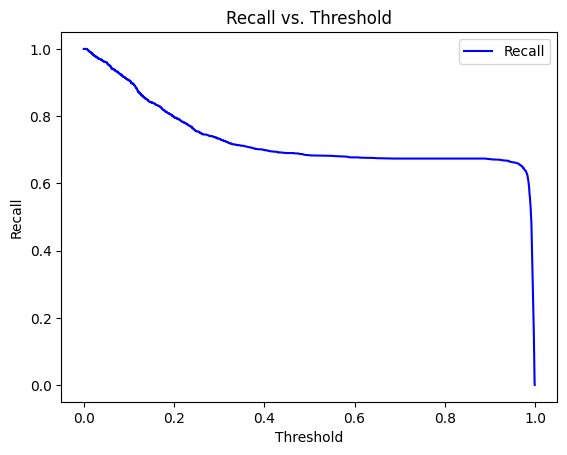

In [240]:
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(thresholds, recall[:-1], 'b-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall vs. Threshold')
plt.legend()
plt.show()


In [241]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 1)
rf = RandomForestClassifier(n_estimators=50,random_state=1,max_depth=15)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9720333333333333


In [242]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')

Accuracy: 0.9720
Precision: 0.9860
Recall: 0.6843
F1 Score: 0.8079
ROC AUC Score: 0.9746


In [243]:
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth = 4, random_seed=42)
model.fit(X_train, y_train, verbose=False)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')

Accuracy: 0.9721
Precision: 0.9839
Recall: 0.6862
F1 Score: 0.8085
ROC AUC Score: 0.9790


In [244]:
gb = HistGradientBoostingClassifier(max_iter = 700, max_depth = 5)
gb.fit(X_train, y_train)

prediction_gb_test = gb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')

Accuracy: 0.9721
Precision: 0.9839
Recall: 0.6862
F1 Score: 0.8085
ROC AUC Score: 0.9798


In [247]:
data['age_groups'] = pd.cut(data['age'],bins = [0,12,19,29,39,54,64,float('inf')],labels = ['child','teenager','young adult','adult','midle aged','old','senior']).astype('O')
data['bmi_groups'] = pd.cut(data['bmi'],bins = [0,18.4,24.9,29.9,float('inf')],labels = ['under weight','normal','overweight','obese']).astype('O')
data = pd.get_dummies(data=data,columns=['age_groups','bmi_groups'],drop_first=True,dtype=int)
data.head() 

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,...,smoking_history_not current,age_groups_child,age_groups_midle aged,age_groups_old,age_groups_senior,age_groups_teenager,age_groups_young adult,bmi_groups_obese,bmi_groups_overweight,bmi_groups_under weight
0,0,80.0,0,1,25.19,6.6,140,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,54.0,0,0,27.32,6.6,80,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,28.0,0,0,27.32,5.7,158,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,36.0,0,0,23.45,5.0,155,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,76.0,1,1,20.14,4.8,155,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [248]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 1)
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth = 4, random_seed=42)
model.fit(X_train, y_train, verbose=False)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')

Accuracy: 0.9721
Precision: 0.9839
Recall: 0.6862
F1 Score: 0.8085
ROC AUC Score: 0.9790


In [249]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Accuracy: {accuracy:.4f}')
print(f'XGBoost Classification Report:\n{classification_report(y_test, y_pred)}')

XGBoost Accuracy: 0.9710
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27422
           1       0.95      0.70      0.81      2578

    accuracy                           0.97     30000
   macro avg       0.96      0.85      0.90     30000
weighted avg       0.97      0.97      0.97     30000



In [251]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1)
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Accuracy: {accuracy:.4f}')
print(f'XGBoost Classification Report:\n{classification_report(y_test, y_pred)}')

XGBoost Accuracy: 0.9716
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18299
           1       0.96      0.70      0.81      1701

    accuracy                           0.97     20000
   macro avg       0.96      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000

